In [155]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Carregando o arquivo
arquivo_compras = pd.read_csv('Vendas Online.csv')
arquivo_compras.head(10)

,ID_Pedido,Produto,Categoria,Data,Quantidade,Valor Unitário,Localidade
0,396104,Azeite,Alimentos,2024-03-28,41,28.72,Nordeste
1,373394,Azeite,Alimentos,2023-03-12,45,23.90,Sul
2,680522,Feijão,Alimentos,2022-12-11,8,15.00,Nordeste
3,462718,Café,Alimentos,2023-07-11,36,12.42,Nordeste
4,298110,Maçã,Hortifruti,2024-03-25,28,4.15,Centro-Oeste
5,181933,Café,Alimentos,2024-02-22,38,6.63,Nordeste
6,457167,Carne,Carnes,2024-02-21,10,135.32,Nordeste
7,617184,Banana,Hortifruti,2023-12-30,15,5.02,Sudeste
8,817787,Shampoo,Higiene Pessoal,2023-06-15,10,56.90,Sul
9,511333,Azeite,Alimentos,2024-05-22,41,22.41,Nordeste


In [152]:
contagem_produtos = produtos.groupby("Produto").count().reset_index()
contagem_produtos = contagem_produtos.rename(columns={"Quantidade": "Contagem_Quantidade"})
contagem_produtos = contagem_produtos.sort_values(by="Contagem_Quantidade", ascending=False)
contagem_produtos = contagem_produtos.reset_index(drop=True)
print(contagem_produtos.head())
print(contagem_produtos.tail())
print(contagem_produtos.describe())
print(contagem_produtos.count())

       Produto  ID_Pedido  Contagem_Quantidade
0  Sabão em Pó        281                  281
1      Laranja        277                  277
2       Frango        273                  273
3        Leite        269                  269
4      Shampoo        269                  269
          Produto  ID_Pedido  Contagem_Quantidade
15     Detergente        241                  241
16         Feijão        231                  231
17         Tomate        230                  230
18      Amaciante        226                  226
19  Condicionador        207                  207
        ID_Pedido  Contagem_Quantidade
count   20.000000            20.000000
mean   250.000000           250.000000
std     18.393363            18.393363
min    207.000000           207.000000
25%    243.250000           243.250000
50%    247.500000           247.500000
75%    262.250000           262.250000
max    281.000000           281.000000
Produto                20
ID_Pedido              20
Contagem_Quanti

In [29]:
compradores = arquivo_compras.loc[:, ["ID_Pedido", "Produto", "Categoria", "Localidade"]]
compradores.head()

,ID_Pedido,Produto,Categoria,Localidade
0,396104,Azeite,Alimentos,Nordeste
1,373394,Azeite,Alimentos,Sul
2,680522,Feijão,Alimentos,Nordeste
3,462718,Café,Alimentos,Nordeste
4,298110,Maçã,Hortifruti,Centro-Oeste


***Qual é o produto mais vendido?***

In [ ]:
soma_produtos = produtos.groupby("Produto").sum().reset_index() # Agrupando por produto e somando as quantidades
soma_produtos = soma_produtos.rename(columns={"Quantidade": "Soma_Quantidade"})# Renomeando a coluna de soma
soma_produtos = soma_produtos.sort_values(by="Soma_Quantidade", ascending=False) # Ordenando pela soma de quantidade  #
soma_produtos = soma_produtos.reset_index(drop=True) # Resetando o índice
soma_produtos = soma_produtos.head() # Pegando os 5 primeiros produtos
soma_produtos.head() # Visualizando os dados

,Produto,ID_Pedido,Soma_Quantidade
0,Sabão em Pó,146629228,7637
1,Frango,144751760,7308
2,Leite,142227484,7264
3,Laranja,148735606,7017
4,Shampoo,154771802,6882


Text(0.5, 1.0, 'Top 5 Produtos Mais Vendidos')

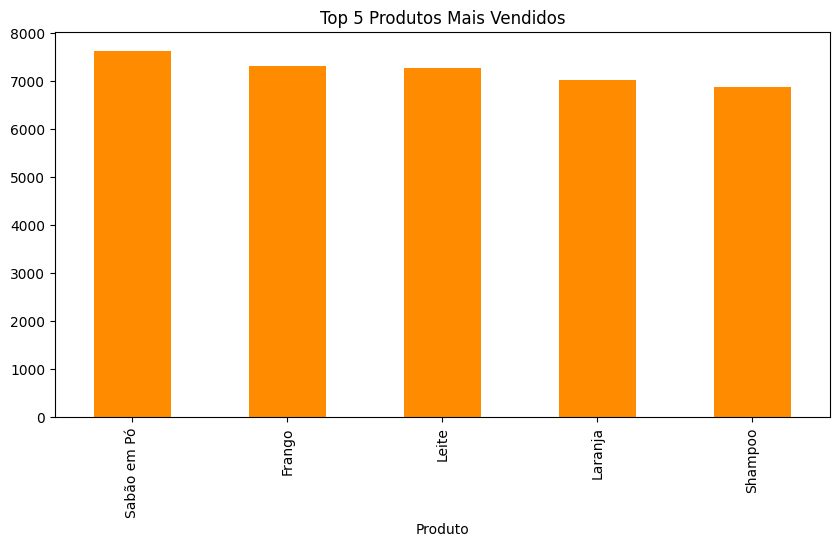

In [ ]:
grafico = soma_produtos.plot(x="Produto", y="Soma_Quantidade", kind="bar", figsize=(10, 5), color="darkorange", legend=False) # Criando o gráfico de barras
grafico.set_title("Top 5 Produtos Mais Vendidos") # Definindo o título do gráfico


***Quais sao as 3 regiões com maior faturamento?***
    

     Localidade  Total_Faturamento
0           Sul          797147.05
1       Sudeste          772424.91
2  Centro-Oeste          763249.20


Text(0.5, 1.0, 'Top 3 Regiões com Maior Faturamento')

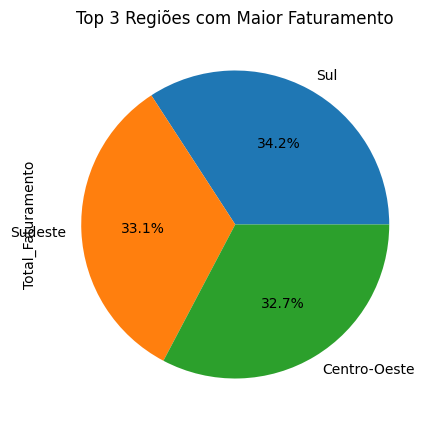

In [121]:
# Somando o faturamento por região
soma_Localidade = arquivo_compras.groupby("Localidade")["Valor_Total"].sum().reset_index()

# Renomeando a coluna de soma
soma_Localidade.columns = ["Localidade", "Total_Faturamento"]

# Ordenando do maior para o menor
soma_regiao = soma_Localidade.sort_values(by="Total_Faturamento", ascending=False).reset_index(drop=True)

# Pegando as 3 regiões com maior faturamento
top_3_regioes = soma_regiao.head(3)

# Visualizando
print(top_3_regioes)

# Criando gráfico de pizza
grafico = top_3_regioes.plot.pie(
    y="Total_Faturamento",
    labels=top_3_regioes["Localidade"],
    autopct="%1.1f%%",
    figsize=(10, 5),
    legend=False
)
grafico.set_title("Top 3 Regiões com Maior Faturamento")


***contando as ocorrencia por faturamento e localidade***

  Localidade  Soma_Localidade
0        Sul             1038
1    Sudeste             1002
2   Nordeste             1002


Text(0.5, 1.0, 'Top 3 Localidades com maior ocorrencia de vendas')

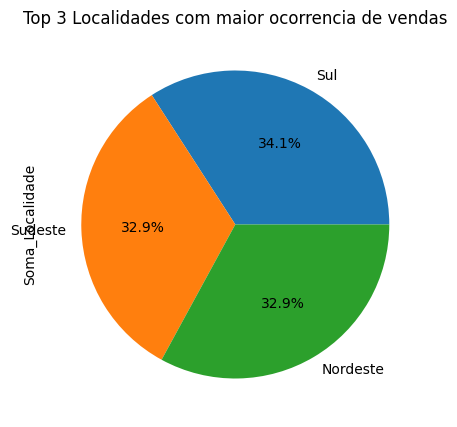

In [125]:
Localidade = arquivo_compras.loc[:, ["Localidade"]]
soma_Localidade = Localidade.value_counts().reset_index()  # contando as ocorrências de cada localidade
soma_Localidade.columns = ["Localidade", "Soma_Localidade"]  # Renomeando as colunas
soma_Localidade = soma_Localidade.sort_values(by="Soma_Localidade", ascending=False)  # Ordenando pela soma de quantidade de localidade
soma_Localidade = soma_Localidade.reset_index(drop=True)  # Resetando o índice
Faturamento = soma_Localidade.head(3)  # Pegando as 3 primeiras localidades
print(Faturamento)  # Visualizando os dados
#criando grafico de pizza
grafico = Faturamento.plot.pie(y="Soma_Localidade", labels=Faturamento["Localidade"], autopct="%1.1f%%", figsize=(10, 5), legend=False) # Criando o gráfico de pizza
grafico.set_title("Top 3 Localidades com maior ocorrencia de vendas") # Definindo o título do gráfico

***Existe uma relação entre categorias de produto e ticket médio?***


         Categoria  Valor_Total  Quantidade  Ticket_Medio
0           Carnes   1707618.69       19410     87.976233
1  Higiene Pessoal    513623.22       11960     42.945085
2          Limpeza    637427.19       19578     32.558340
3        Alimentos    725119.90       45410     15.968287
4       Hortifruti    263455.66       31853      8.270984


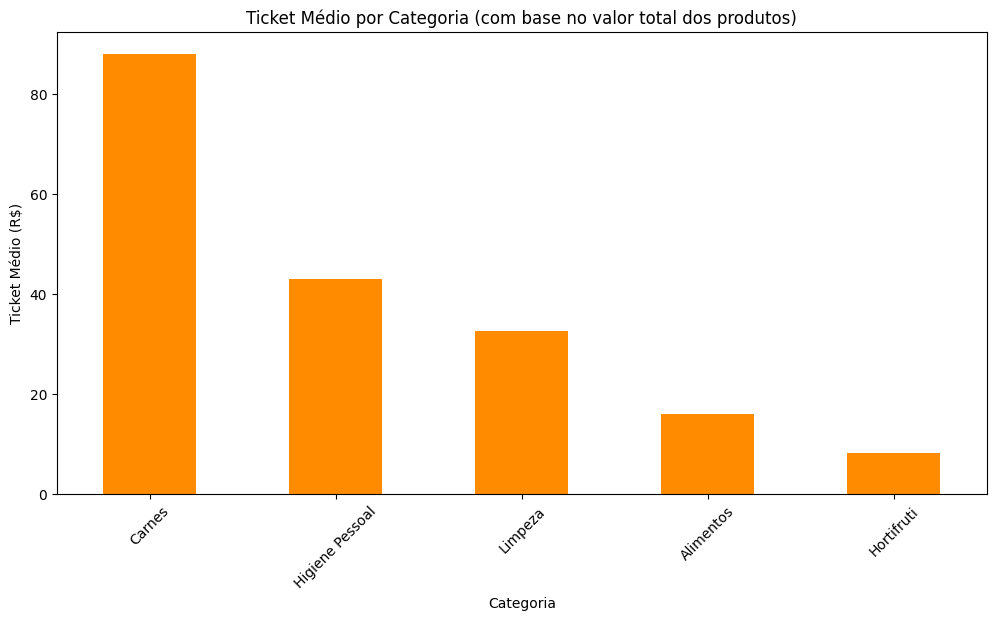

In [ ]:
# Etapa 1: Somar o valor total de vendas e quantidade de cada produto
produto_resumo = arquivo_compras.groupby(["Produto", "Categoria"]).agg({
    "Valor_Total": "sum",
    "Quantidade": "sum"
}).reset_index()

# Etapa 2: Agrupar por categoria somando os valores totais e quantidades de todos os produtos dessa categoria
categoria_agrupada = produto_resumo.groupby("Categoria").agg({
    "Valor_Total": "sum",
    "Quantidade": "sum"
}).reset_index()

# Etapa 3: Calcular o ticket médio por categoria
categoria_agrupada["Ticket_Medio"] = categoria_agrupada["Valor_Total"] / categoria_agrupada["Quantidade"]

# Ordenar pelo ticket médio
categoria_agrupada = categoria_agrupada.sort_values(by="Ticket_Medio", ascending=False).reset_index(drop=True)

# Visualizar
print(categoria_agrupada)

# Criar gráfico de barras
grafico = categoria_agrupada.plot.bar(
    x="Categoria",
    y="Ticket_Medio",
    figsize=(12, 6),
    legend=False,
    color="darkorange"
)
grafico.set_title("Ticket Médio por Categoria (com base no valor total dos produtos)")
grafico.set_ylabel("Ticket Médio (R$)")
grafico.set_xlabel("Categoria")
grafico.tick_params(axis='x', rotation=45)


Text(0.5, 1.0, 'Ticket Médio por Categoria')

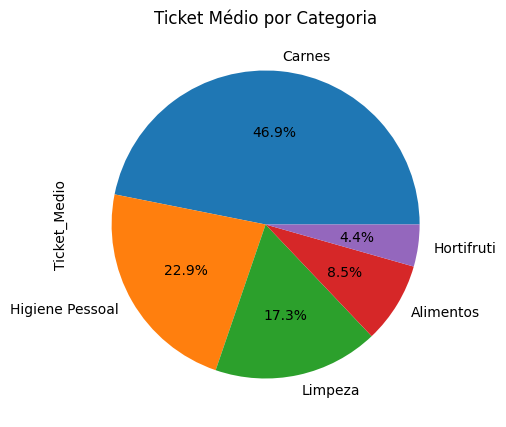

In [ ]:

#grafico pizza com valores de ticket medio
grafico = categoria_agrupada.plot.pie(y="Ticket_Medio", labels=categoria_agrupada["Categoria"], autopct="%1.1f%%", figsize=(10, 5), legend=False) # Criando o gráfico de pizza
grafico.set_title("Ticket Médio por Categoria") # Definindo o título do gráfico


***Como o faturamento varia ao longo do tempo?***   
Crie uma análise temporal para observar como as vendas se comportam ao longo dos meses. Identifique picos e possíveis sazonalidades que possam guiar estratégias de marketing.

In [153]:

# Criar a coluna Valor_Total
arquivo_compras["Valor_Total"] = arquivo_compras["Valor Unitário"] * arquivo_compras["Quantidade"]

# Agrupar por categoria e calcular a soma do valor total e a quantidade total de pedidos
categoria_valor = arquivo_compras.groupby("Categoria").agg({"Valor_Total": "sum", "Quantidade": "sum"}).reset_index()
categoria_valor.columns = ["Categoria", "Total_Faturamento_categoria", "Total_Pedidos"]  # Renomeando as colunas

# Calcular o ticket médio
categoria_valor["Ticket_Medio"] = categoria_valor["Total_Faturamento_categoria"] / categoria_valor["Total_Pedidos"]
# 2. Verificar os dados iniciais
print(categoria_valor.head())

# 3. Criar a coluna 'ano_mes' a partir da coluna 'Data'
arquivo_compras['Data'] = pd.to_datetime(arquivo_compras['Data'])  # Certificar-se de que a coluna 'Data' está no formato datetime
arquivo_compras['ano_mes'] = arquivo_compras['Data'].dt.to_period('M')  # Criar a coluna 'ano_mes'

         Categoria  Total_Faturamento_categoria  Total_Pedidos  Ticket_Medio
0        Alimentos                    725119.90          45410     15.968287
1           Carnes                   1707618.69          19410     87.976233
2  Higiene Pessoal                    513623.22          11960     42.945085
3       Hortifruti                    263455.66          31853      8.270984
4          Limpeza                    637427.19          19578     32.558340


   ano_mes  Valor_Total
0  2022-10    136398.03
1  2022-11    163107.20
2  2022-12    153910.31
3  2023-01    168109.65
4  2023-02    152667.62
5  2023-03    159424.99
6  2023-04    141289.54
7  2023-05    155620.72
8  2023-06    161563.18
9  2023-07    149656.91


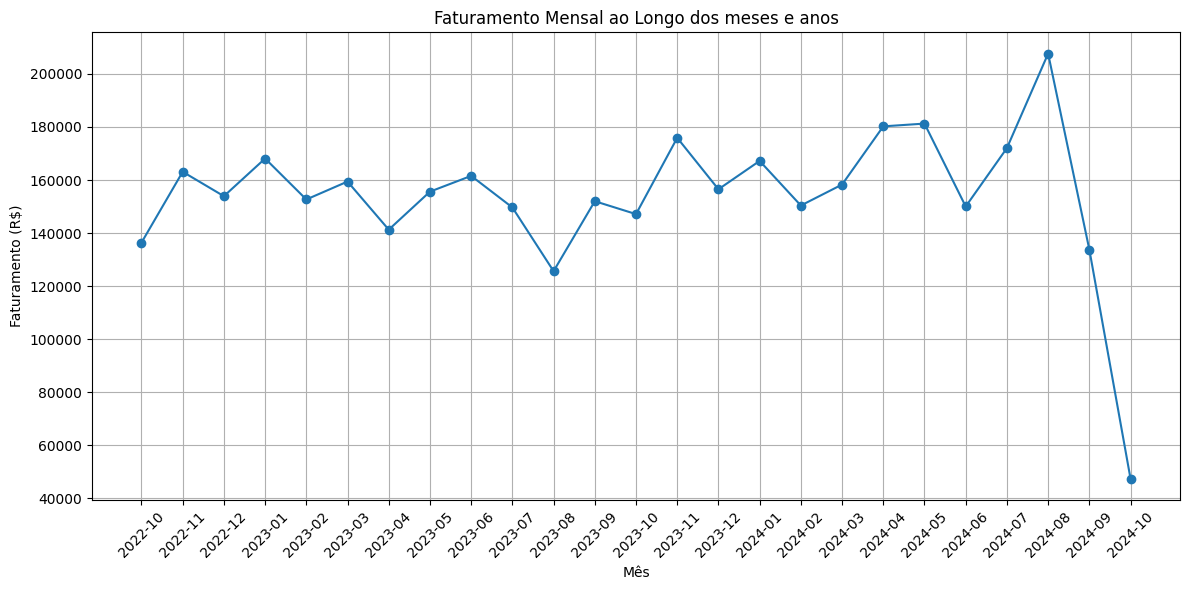

In [154]:
#Analise temporal ao longo dos meses e anos

# 4. Agrupar por 'ano_mes' e calcular o faturamento total
faturamento_mensal = arquivo_compras.groupby('ano_mes')['Valor_Total'].sum().reset_index()
print(faturamento_mensal.head(10))  # Verificar os dados agrupados

# 5. Converter 'ano_mes' para string para consistência
faturamento_mensal['ano_mes'] = faturamento_mensal['ano_mes'].astype(str)

# 6. Plotar a série temporal
plt.figure(figsize=(12,6))
plt.plot(faturamento_mensal['ano_mes'], faturamento_mensal['Valor_Total'], marker='o')
plt.title('Faturamento Mensal ao Longo dos meses e anos')
plt.xlabel('Mês')
plt.ylabel('Faturamento (R$)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


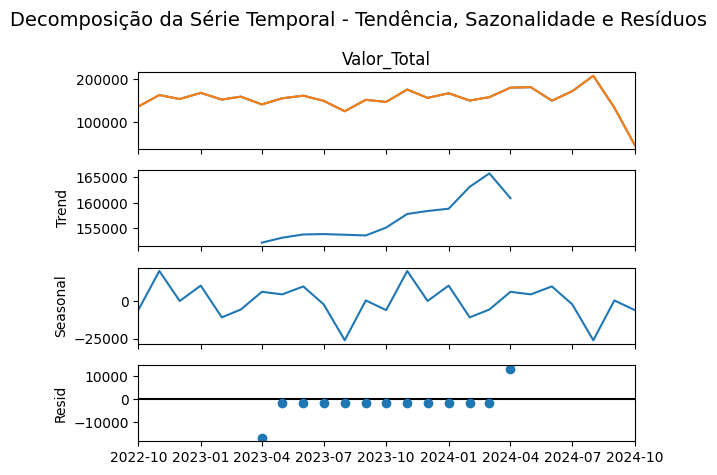

In [92]:
#analise de sazonalidade
from statsmodels.tsa.seasonal import seasonal_decompose

# 2. Agrupar por mês
arquivo_compras['ano_mes'] = arquivo_compras['Data'].dt.to_period('M')
faturamento_mensal = arquivo_compras.groupby('ano_mes')['Valor_Total'].sum()
faturamento_mensal.index = faturamento_mensal.index.to_timestamp()

# 3. Decompor a série temporal
decomposicao = seasonal_decompose(faturamento_mensal, model='additive', period=12)

# 4. Plotar os componentes
decomposicao.plot()
plt.subplot(411)
plt.plot(faturamento_mensal, label='Série Original')
plt.suptitle('Decomposição da Série Temporal - Tendência, Sazonalidade e Resíduos', fontsize=14)
plt.tight_layout()
plt.show()


***Quais produtos têm mais sucesso em cada região?***    

Determine os produtos mais vendidos em cada região. Isso permitirá que a GreenMart direcione campanhas regionais com base nas preferências locais.

     Localidade      Produto  Quantidade
0           Sul        Peixe        1727
1         Norte      Laranja        1715
2      Nordeste  Sabão em Pó        1657
3       Sudeste  Sabão em Pó        1652
4  Centro-Oeste  Sabão em Pó        1588


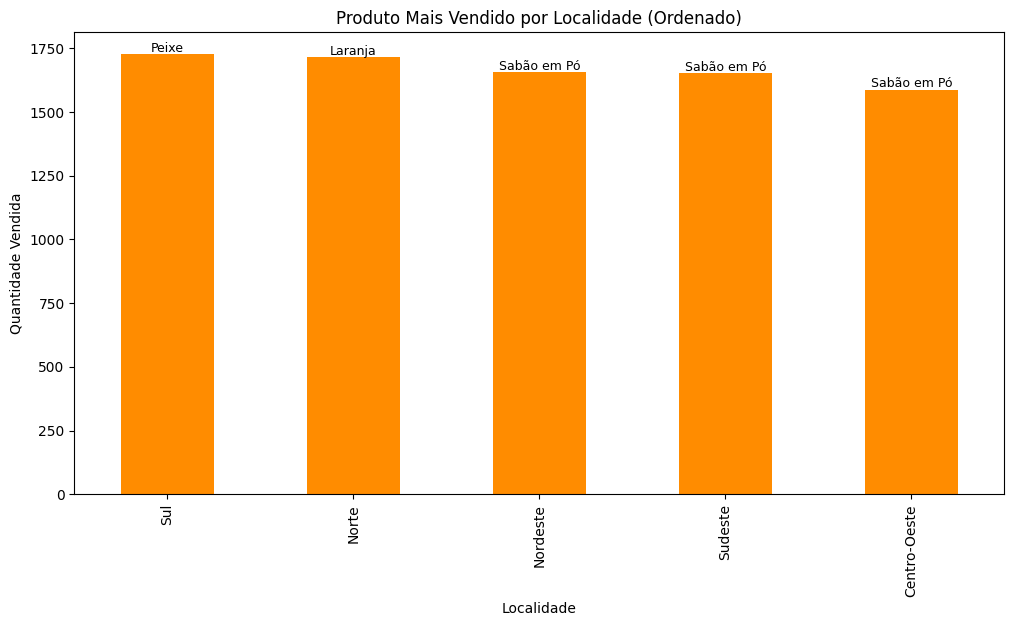

In [151]:
# Agrupar por Região e Produto, somando as quantidades
produtos_Localidade = arquivo_compras.groupby(["Localidade", "Produto"])["Quantidade"].sum().reset_index()

# Para cada região, encontrar o(s) produto(s) com maior quantidade
mais_vendidos_regiao = produtos_Localidade.sort_values(['Localidade', 'Quantidade'], ascending=[True, False])
mais_vendidos_top = mais_vendidos_regiao.groupby("Localidade").head(1).reset_index(drop=True)

# Ordenar do mais vendido para o menos vendido
mais_vendidos_top = mais_vendidos_top.sort_values(by="Quantidade", ascending=False).reset_index(drop=True)

# Exibir os produtos mais vendidos por região

print(mais_vendidos_top)
# Criar gráfico de barras
grafico = mais_vendidos_top.plot.bar(
    x="Localidade",
    y="Quantidade",
    color="darkorange",
    figsize=(12, 6),
    legend=False
)
grafico.set_title("Produto Mais Vendido por Localidade (Ordenado)")
grafico.set_ylabel("Quantidade Vendida")

# Adicionar os nomes dos produtos como rótulos acima das barras
for index, row in mais_vendidos_top.iterrows():
    grafico.text(index, row["Quantidade"] + 10, row["Produto"], ha="center", fontsize=9)
